# **University of Abomey Calavi**  
### **LABEF – Laboratoire de Biomathématiques et d'Estimations Forestières**  

# **Support Vector Machines (SVM)**  


### **Prepared by:**  
  
- **Ogero Mercy** — 25%  



# Problem Statement


## Dataset Presentation

The "UCI_Credit_Card" dataset is a collection of data provided by the University of California, Irvine (UCI) via their Machine Learning repository. This dataset comprises 30,000 instances with 25 attributes that represent credit information and payment behavior of customers from a Taiwanese bank. The dataset can be downloaded from the following links:

- [Lien vers l'ensemble de données sur UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)
- [Lien vers l'ensemble de données sur Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)




## Problem Statement

The main objective of our analysis is to predict whether a customer will default on their payment the following month, based on the provided credit information and payment behavior. This is a binary classification problem where we try to classify customers between those who will default (1) and those who will not (0).

## Variable Description

Explanatory Variables for Our Model are:

1. ID: Unique identification number assigned to each client.

2. LIMIT_BAL: Amount of credit granted (in NT dollars). This includes both individual consumer credit and family/supplementary credit.

3. SEX: Client Gender (1 = male, 2 = female).

4. EDUCATION: Client Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others).

5. MARRIAGE: Client Marital status (1 = married, 2 = single, 3 = others).

6. AGE: Client Age in years.

7. PAY_0 to PAY_6: Repayment status from September to April, respectively. The scale is as follows: -1 = paid duly; 1 = payment delay for one month; 2 = payment delay for two months, and so on up to 8 = payment delay for eight months; 9 = payment delay for nine months and more.

8. BILL_AMT1 to BILL_AMT6: Bill amount (amount of statement) in NT dollars from September to April, respectively.

9. PAY_AMT1 to PAY_AMT6: Amount of previous payment (in NT dollars) from September to April, respectively.

# 4. Loading Libraries

In [23]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Import and Describe the Dataset

In [24]:
# Load the dataset
df = pd.read_csv("C://Users//Lenovo//OneDrive//Documents//Desktop//MBIOSTAT//ARTIFICIAL INTELLIGENCE//UCI_Credit_Card.csv")

In [25]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [26]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [28]:
# Missing Value Analysis
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [29]:
# Dataset Description
df.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


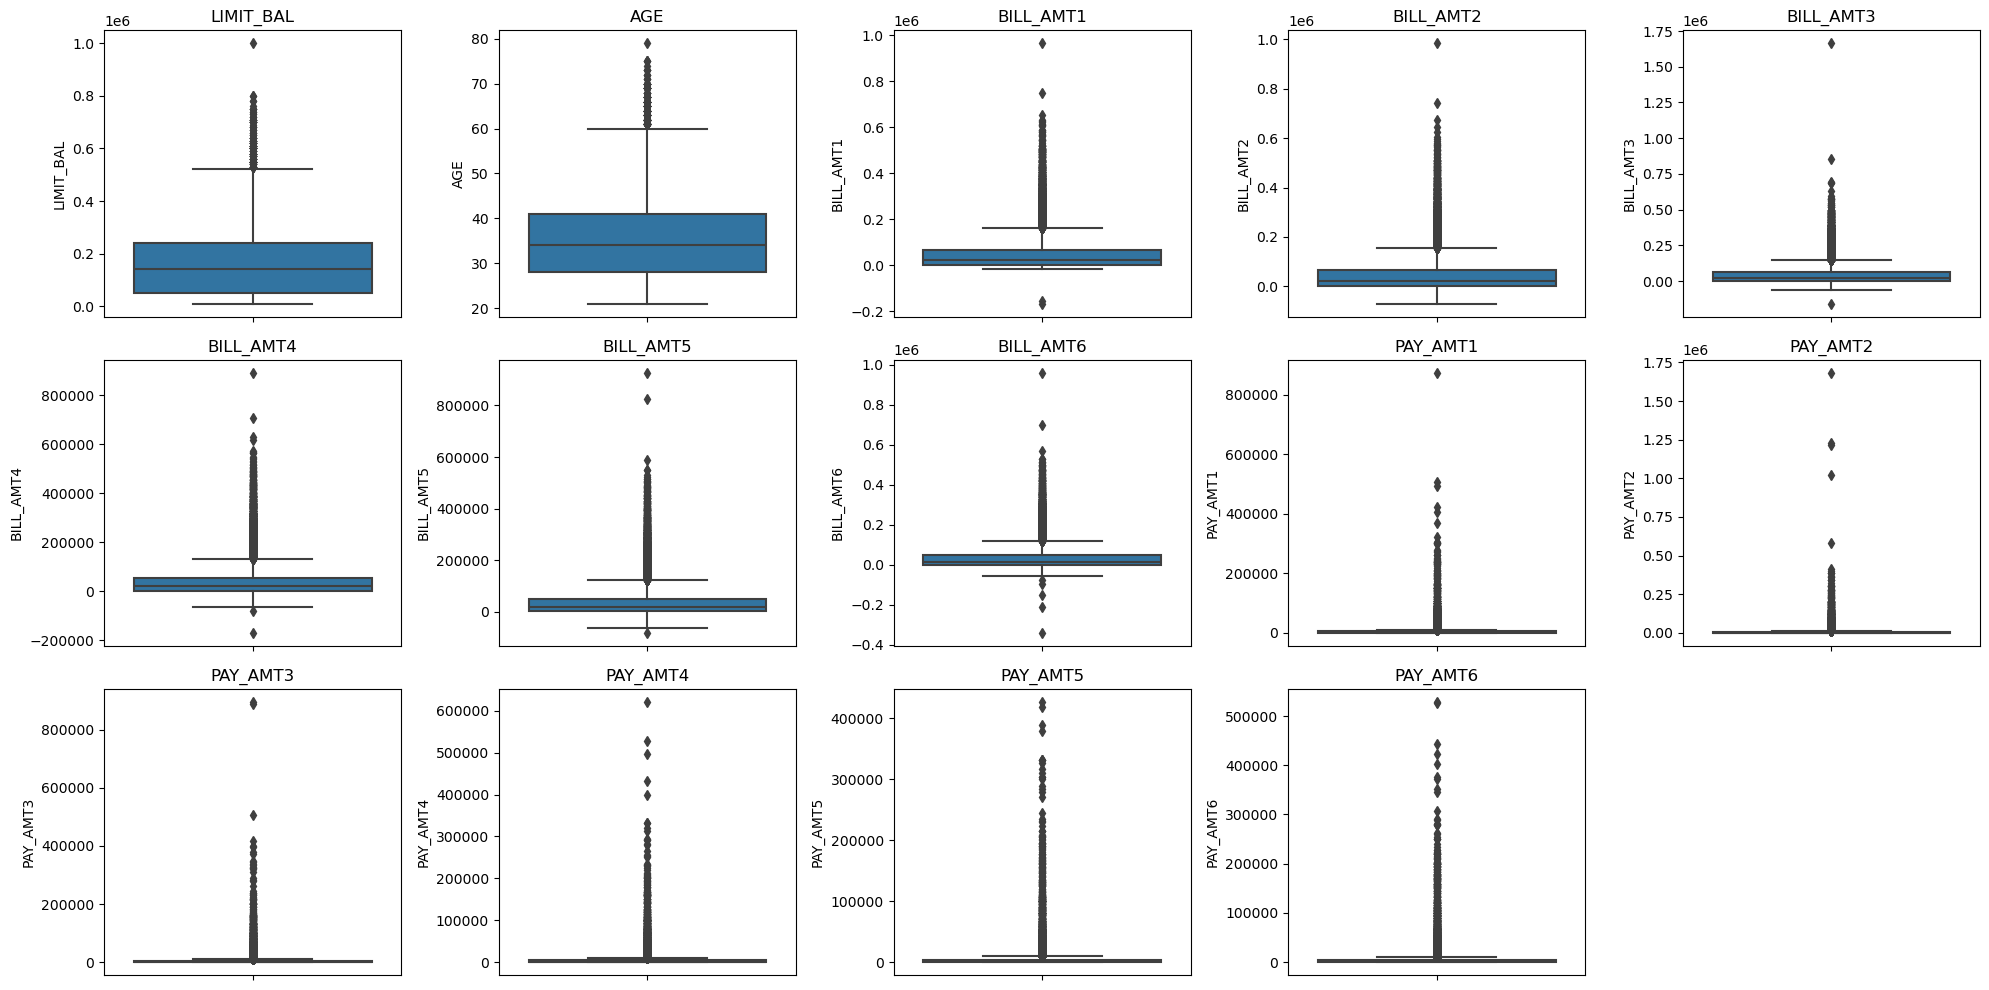

In [30]:
# Quantitative Variables to Display
quant_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
              'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a Figure
plt.figure(figsize=(20,10))

# Create a box plot for each quantitative variable for checking for outliers
for i, var in enumerate(quant_vars):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data = df, y = var)
    plt.title(var)

# Display the figure
plt.tight_layout()
plt.show()

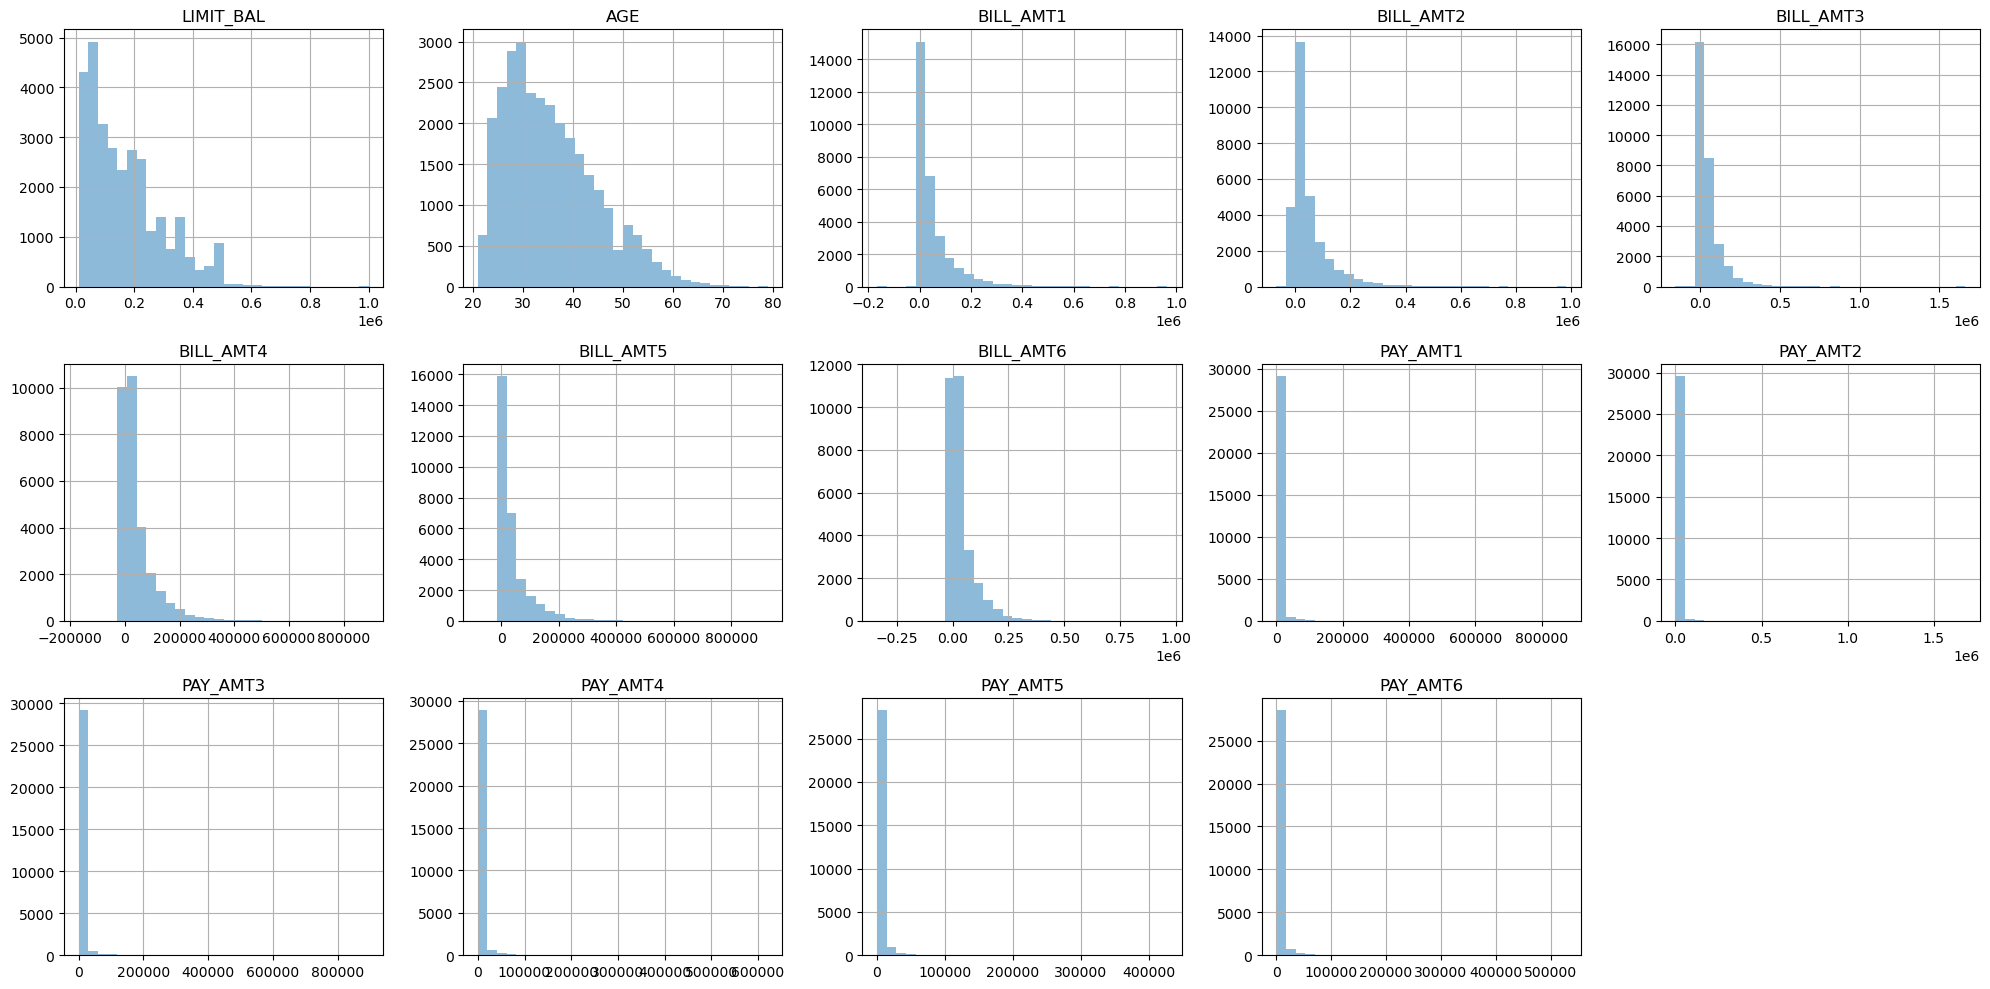

In [31]:
# Create a Figure
plt.figure(figsize=(20,10))

# Create a histogram for each quantitative variable for checking the distribution
for i, var in enumerate(quant_vars):
    plt.subplot(3, 5, i+1)
    df[var].hist(bins=30, alpha=0.5)
    plt.title(var)

# Display the figure
plt.tight_layout()
plt.show()

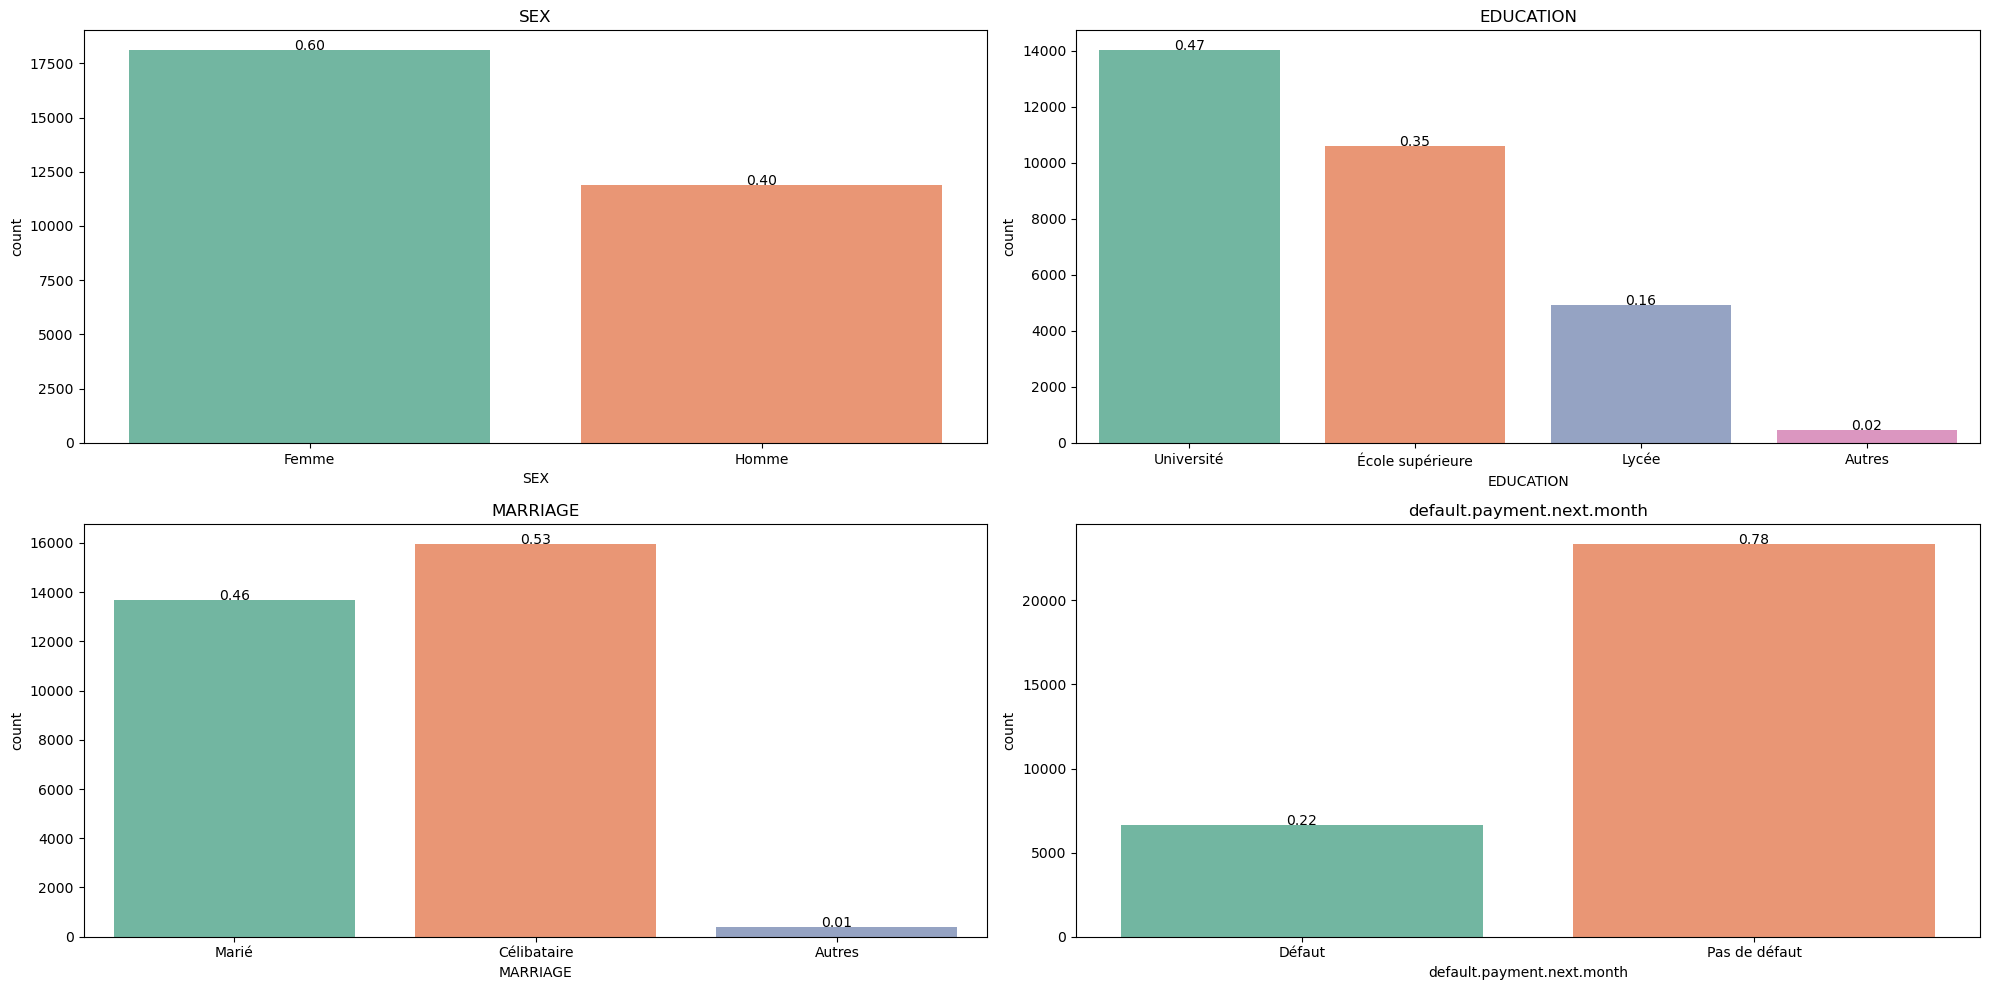

In [32]:
# Qualitative Variables to Display with their Respective Meanings
qual_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']
labels = {
    'SEX': {1: 'Homme', 2: 'Femme'},
    'EDUCATION': {1: 'École supérieure', 2: 'Université', 3: 'Lycée', 4: 'Autres',5:'Autres',6:'Autres',0:'Autres'},
    'MARRIAGE': {1: 'Marié', 2: 'Célibataire', 3: 'Autres',0:'Autres'},
    'default.payment.next.month': {0: 'Pas de défaut', 1: 'Défaut'}
}

# Create a copy of the dataframe with the qualitative variable labels
df_copy = df.copy()
df_copy.replace(labels, inplace=True)

# Create a figure
plt.figure(figsize=(20,10))

# Create a bar plot for each qualitative variable
for i, var in enumerate(qual_vars):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(data=df_copy, x=var, palette="Set2")
    plt.title(var)

    # Add the proportions
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

# Display a figure
plt.tight_layout()
plt.show()






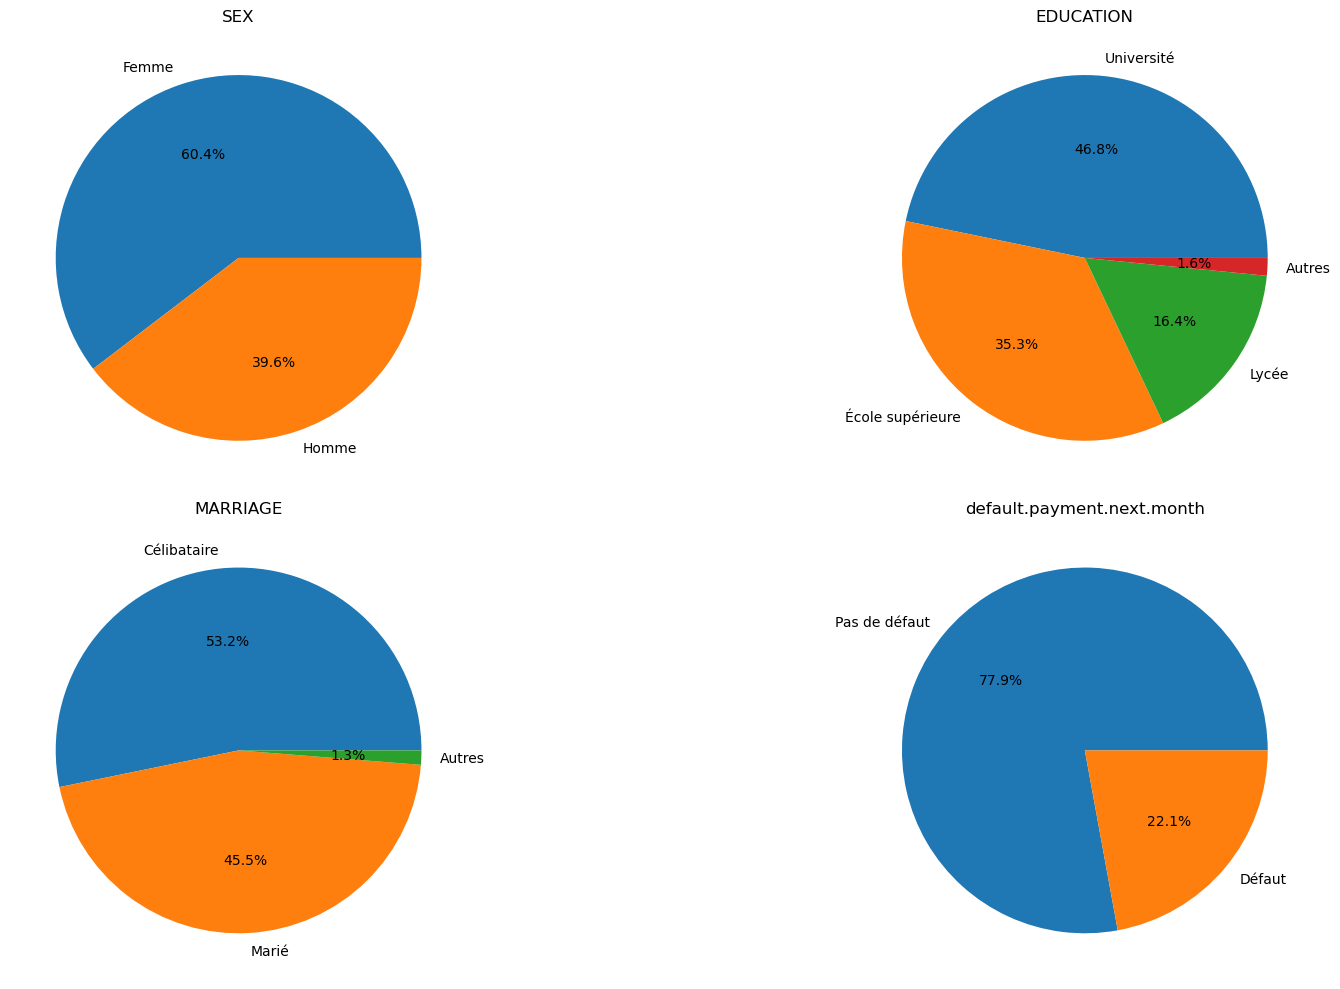

In [33]:
# Create a figure
plt.figure(figsize=(20,10))

# Create a pie chart for each qualitative variable
for i, var in enumerate(qual_vars):
    plt.subplot(2, 2, i+1)
    df_copy[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.ylabel('')

# Display a figure
plt.tight_layout()
plt.show()

# Bivariate Analysis

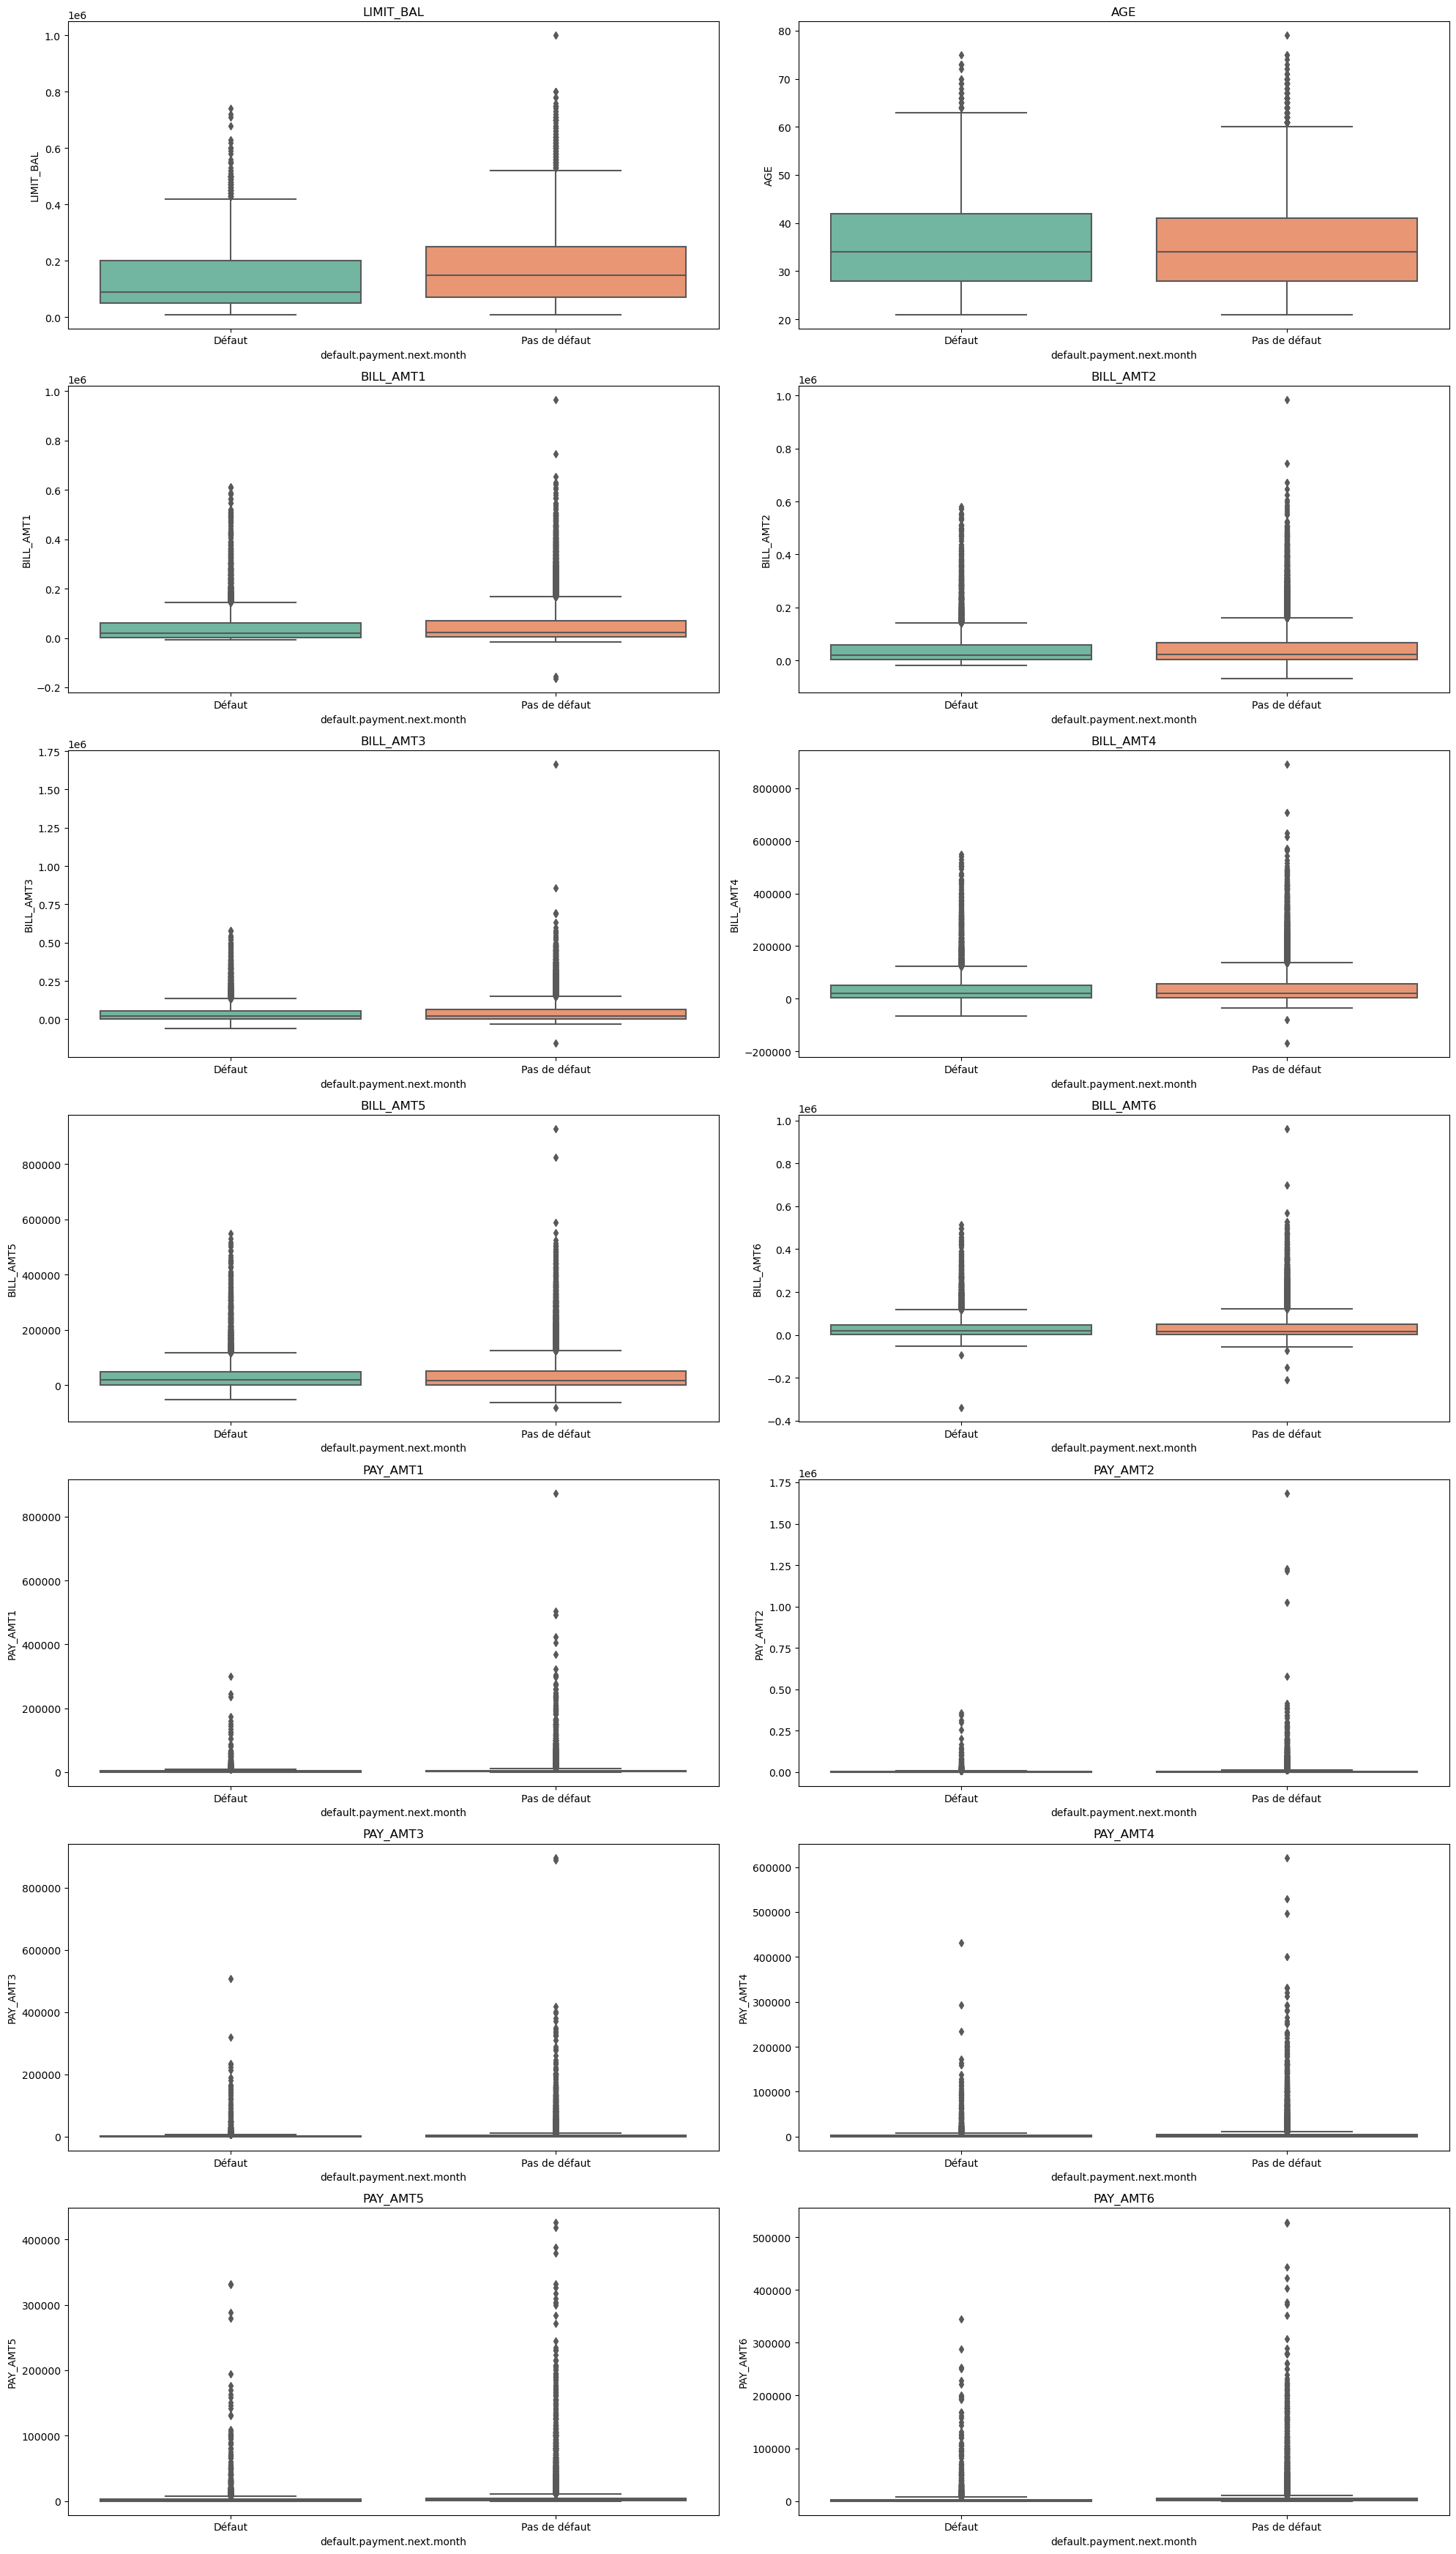

In [34]:


# Create a figure
plt.figure(figsize=(20,35))

# Create a box plot for each quantitative variable
for i, var in enumerate(quant_vars):
    plt.subplot(7, 2, i+1)
    sns.boxplot(data = df_copy, x = 'default.payment.next.month', y = var, palette="Set2")
    plt.title(var)

# Display a figure
plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import kruskal

# Calculate the Kruskal-Wallis test statistics and p-values for each variable
test_stats = []
p_values = []
for var in quant_vars:
    groups = [df[var][df['default.payment.next.month'] == 0],
              df[var][df['default.payment.next.month'] == 1]]
    test_stat, p_value = kruskal(*groups)
    test_stats.append(test_stat)
    p_values.append(p_value)

# Create a dataframe for variable ranking
ranking_df = pd.DataFrame({'Variable': quant_vars, 'Test Statistic': test_stats, 'p-value': p_values})
ranking_df.sort_values('Test Statistic', ascending=False, inplace=True)

# Display the ranking table
print(ranking_df)


     Variable  Test Statistic        p-value
0   LIMIT_BAL      862.756409  1.225520e-189
8    PAY_AMT1      772.715560  4.616556e-170
9    PAY_AMT2      683.802429  9.954766e-151
10   PAY_AMT3      582.851233  8.992533e-129
11   PAY_AMT4      491.339268  7.284564e-109
13   PAY_AMT6      442.441975   3.184062e-98
12   PAY_AMT5      407.762871   1.124851e-90
2   BILL_AMT1       19.242804   1.151034e-05
3   BILL_AMT2        7.257338   7.061188e-03
4   BILL_AMT3        4.815637   2.820264e-02
5   BILL_AMT4        2.095146   1.477676e-01
6   BILL_AMT5        1.408132   2.353667e-01
1         AGE        0.795297   3.725031e-01
7   BILL_AMT6        0.000174   9.894802e-01


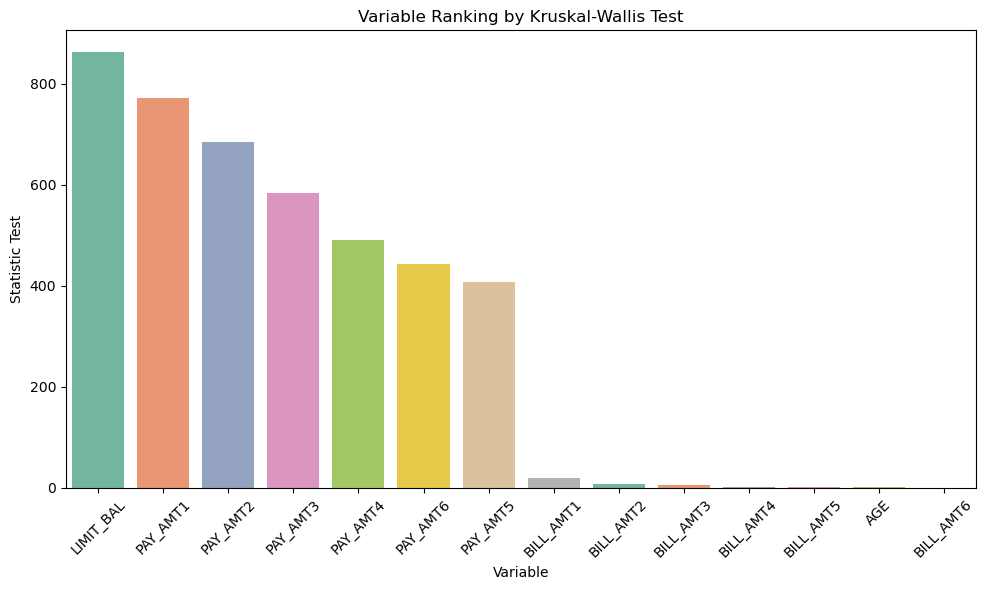

In [36]:

# Create a ranking chart
plt.figure(figsize=(10, 6))
sns.barplot(data=ranking_df, x='Variable', y='Test Statistic', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Variable')
plt.ylabel('Statistic Test')
plt.title('Variable Ranking by Kruskal-Wallis Test')
plt.tight_layout()
plt.show()

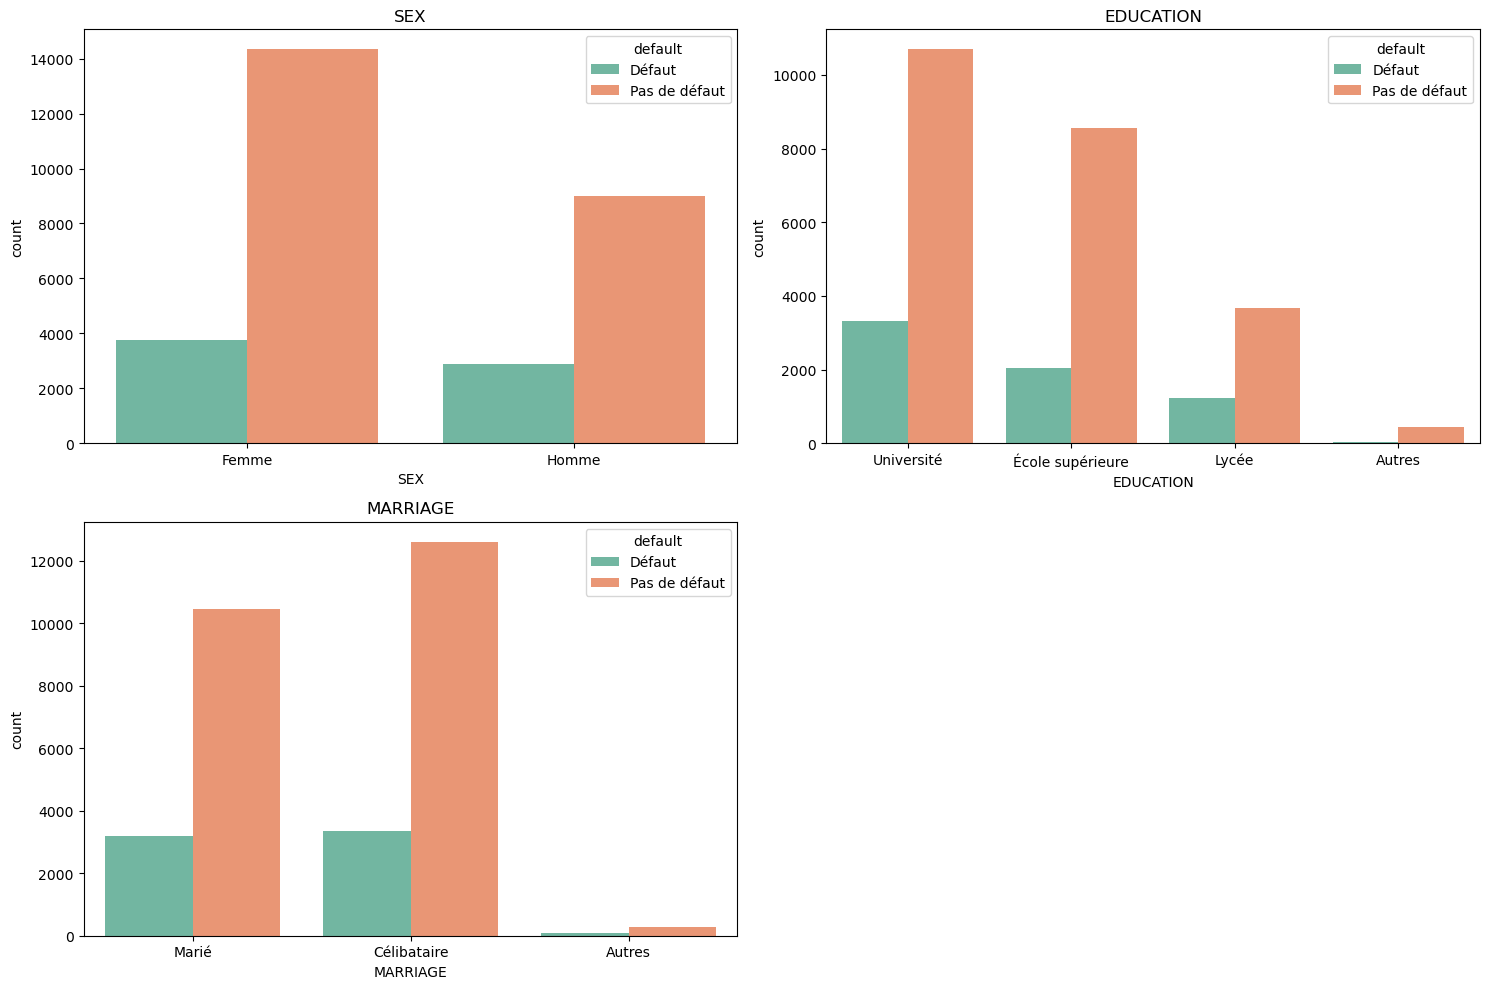

In [37]:
# Qualitative Variables to Include
qual_vars = ['SEX', 'EDUCATION', 'MARRIAGE']

# Create a figure
plt.figure(figsize=(15, 10))

# Create bivariate plots showing the relationship between categorical variables and default
for i, var in enumerate(qual_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df_copy, x=var, hue='default.payment.next.month', palette='Set2')
    plt.title(var)
    plt.legend(title='default')

# Adjust the spacing between subplots
plt.tight_layout()

# Display a figure
plt.show()

In [38]:
import numpy as np
from scipy.stats import chi2_contingency

# Calculate the Chi-squared test statistic, p-value, and Cramer's V for each qualitative variable
stats = []
for var in qual_vars:
    contingency_table = pd.crosstab(df_copy[var], df_copy['default.payment.next.month'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    num_rows, num_cols = contingency_table.shape
    v_cramer = np.sqrt(chi2 / (df_copy.shape[0] * min(num_rows - 1, num_cols - 1)))
    stats.append([var, chi2, p_value, v_cramer])

# Create a summary statistics dataframe
stats_df = pd.DataFrame(stats, columns=['Variable', 'Chi-square', 'p-value', 'V Cramer'])
stats_df.sort_values('p-value', ascending=True, inplace=True)

# Display thetable
print(stats_df)

    Variable  Chi-square       p-value  V Cramer
1  EDUCATION  160.409951  1.495065e-34  0.073123
0        SEX   47.708797  4.944679e-12  0.039878
2   MARRIAGE   28.130325  7.790720e-07  0.030622


# Initial SVM Model without Hyperparameter Tuning(Optimization)

## Data Preparation

In [39]:
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into train and test ( Train-Test Split)
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']



In [40]:
## One hot encoding of Qualitative variables 
# Perform One-Hot Encoding on the qualitative variables
X_encoded = pd.get_dummies(X, columns=qual_vars, drop_first=True)
X_encoded.describe(include="all")

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,True,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18112,19415,15970,25083,29877,29720,29949,16341,15964,29677
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
X_encoded.isnull().sum()

ID             0
LIMIT_BAL      0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
SEX_2          0
EDUCATION_1    0
EDUCATION_2    0
EDUCATION_3    0
EDUCATION_4    0
EDUCATION_5    0
EDUCATION_6    0
MARRIAGE_1     0
MARRIAGE_2     0
MARRIAGE_3     0
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
# Divide the data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [43]:
# # Select the quantitative variables in the training set
#This is important because scaling should only be applied to numeric data, not categorical dummy variables.
X_train_quant = X_train[quant_vars]

# Apply the StandardScaler on the quantitative variables of the training set
scaler = StandardScaler()

X_train_quant_scaled = scaler.fit_transform(X_train_quant)

# Create a DataFrame with the scaled quantitative variables
X_train_scaled = pd.DataFrame(X_train_quant_scaled, columns=quant_vars).reset_index(drop=True)

# Select the qualitative variables in the training set
X_train_nonquant = X_train.drop(quant_vars, axis=1).reset_index(drop=True)

# Concatenate the scaled quantitative variables with the qualitative variables of the training set
X_train_encoded = pd.concat([X_train_scaled, X_train_nonquant], axis=1)

# Set the index on the "ID" column
X_train_encoded.set_index('ID', inplace=True)

In [44]:
# Apply the StandardScaler to the quantitative variables of the test set
X_test_quant_scaled = scaler.transform(X_test[quant_vars])

# Create a DataFrame with the scaled quantitative variables of the test set
X_test_scaled = pd.DataFrame(X_test_quant_scaled, columns=quant_vars).reset_index(drop=True)

# Select the qualitative variables in the test set
X_test_nonquant = X_test.drop(quant_vars, axis=1).reset_index(drop=True)

# Concatenate the scaled quantitative variables with the qualitative variables of the test set
X_test_encoded = pd.concat([X_test_scaled, X_test_nonquant], axis=1)
X_test_encoded.set_index('ID', inplace=True)

## Model Creation

In [45]:
## Model Creation
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC()

# Train the SVM model on the scaled training data
svm_model.fit(X_train_encoded, y_train)

SVC()

## Model Prediction and Evaluation (performance)

In [46]:
# Make predictions on the training and test sets
y_train_pred = svm_model.predict(X_train_encoded)
y_test_pred = svm_model.predict(X_test_encoded)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate the evaluation metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, svm_model.decision_function(X_train_encoded))


In [48]:
# Calculate the evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, svm_model.decision_function(X_test_encoded))


In [49]:

# Create a table with the evaluation metrics
evaluation_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1_score, train_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

# Display the performance table
print(evaluation_table)

      Metric     Train      Test
0   Accuracy  0.825083  0.819167
1  Precision  0.705667  0.673252
2     Recall  0.362577  0.337395
3   F1 Score  0.479027  0.449518
4        AUC  0.787694  0.716258



-The SVM model was trained to predict whether customers would default on their payments. Evaluation on training and test data shows:

- **Accuracy (~82%)**  
  The model correctly predicts default or non-default for about 82% of customers, showing consistent performance.

- **Precision (~67 to 70%)**  
  When the model predicts a customer will default, it is correct around 70% of the time.

- **Recall (0.3373 to 0.362577)**  
  Only about one-third of actual defaulters are correctly identified, meaning many risky customers are missed.

- **F1 Score (~0.449 to 0.479)**  
  Reflects the balance between precision and recall, showing moderate overall predictive ability.

- **AUC (Train: 0.788, Test: 0.716)**  
  Indicates reasonable ability to separate defaulters from non-defaulters, with minor overfitting from training to test data.

**Summary:**  
The model predicts defaults fairly reliably but misses a significant number of actual defaulters.


In [ ]:
# Create the ROC curves for the training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, svm_model.decision_function(X_train_encoded))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, svm_model.decision_function(X_test_encoded))

# Calculate the AUC for the training and test sets
auc_train = roc_auc_score(y_train, svm_model.decision_function(X_train_encoded))
auc_test = roc_auc_score(y_test, svm_model.decision_function(X_test_encoded))

# Display the ROC curves with AUC values
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Training ROC Curve (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# SVM with Parameter Optimization


The best parameters to optimize for an SVM model are the following:

1. **C (Regularization Coefficient):** : This parameter controls the **margin of error in the SVM model**. 
A higher value of C will allow the model to correctly classify a maximum number of training samples, but may lead to overfitting. A lower value of C will allow the model to have a larger margin of error, which can improve the model's generalization. It is advisable to explore different values of C, such as 0.1, 1, and 10, to find the best value that suits your dataset.


2. **Kernel** : The kernel determines the transformation of the feature space in which the SVM model performs class separation. Commonly used kernels are:

  - Linear: This kernel is suitable for linearly separable classification problems.

  -RBF (Radial Basis Function): This kernel is suitable for non-linearly separable classification problems. It uses a radial basis function to project the data into a higher-dimensional space.

  -Polynomial: This kernel is also used for non-linear classification. It uses a polynomial function to project the data into a higher-dimensional space.
   
   
3. **Gamma** : The gamma parameter controls the influence of a single sample on the decision boundary. A higher value of gamma will give more weight to samples close to the decision boundary, which can lead to overfitting. A lower value of gamma will give less weight to samples close to the decision boundary, which can improve the model's generalization. Common values for gamma are 0.1, 1, and 'scale', which is equivalent to 1/n_features.
The impact of the best parameters on the SVM model may vary depending on the characteristics of the dataset. Here are a few points to consider:
   - A higher value of C favors model accuracy, but may result in overfitting.
   - Using the RBF kernel allows the SVM model to capture non-linear relationships between the features.
   - The Polynomial kernel also allows for capturing non-linear relationships and can be useful when the relationship between variables is polynomial in nature.


In [ ]:

# Separate the data for each class
defaut = df[df['default.payment.next.month'] == 1]
sain = df[df['default.payment.next.month'] == 0]

# Undersample each class to get 1000 examples of each class
defaut_downsampled = defaut.sample(n=1000, random_state=42)
sain_downsampled = sain.sample(n=1000, random_state=42)

# Concatenate the undersampled examples
df_downsampled = pd.concat([defaut_downsampled, sain_downsampled])
df_downsampled.info()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Quantitative variables to display
quant_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
              'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Qualitative variables to display
qual_vars = ['SEX', 'EDUCATION', 'MARRIAGE']


# Separate the explanatory variables and the variable to predict
X = df_downsampled.drop('default.payment.next.month', axis=1)
y = df_downsampled['default.payment.next.month']


## One-Hot Encoding of Qualitative Variables
# Perform One-Hot Encoding on the qualitative variables
X_encoded = pd.get_dummies(X, columns=qual_vars, drop_first=True)
X_encoded.describe(include="all")

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Select the quantitative variables in the training set
X_train_quant = X_train[quant_vars]

# Apply the StandardScaler on the quantitative variables of the training set
scaler = StandardScaler()

X_train_quant_scaled = scaler.fit_transform(X_train_quant)


# Create a DataFrame with the scaled quantitative variables
X_train_scaled = pd.DataFrame(X_train_quant_scaled, columns=quant_vars).reset_index(drop=True)

# Select the qualitative variables in the training set
X_train_nonquant = X_train.drop(quant_vars, axis=1).reset_index(drop=True)

# Concatenate the scaled quantitative variables with the qualitative variables of the training set
X_train_encoded = pd.concat([X_train_scaled, X_train_nonquant], axis=1)

# Set the index on the "ID" column
X_train_encoded.set_index('ID', inplace=True)

In [ ]:
# Apply the StandardScaler to the quantitative variables of the test set
X_test_quant_scaled = scaler.transform(X_test[quant_vars])

# Create a DataFrame with the scaled quantitative variables of the test set
X_test_scaled = pd.DataFrame(X_test_quant_scaled, columns=quant_vars).reset_index(drop=True)

# Select the qualitative variables in the test set
# NOTE: The original French comment incorrectly referred to the 'training set' (ensemble d'entraînement) here.
X_test_nonquant = X_test.drop(quant_vars, axis=1).reset_index(drop=True)

# Concatenate the scaled quantitative variables with the qualitative variables of the test set
X_test_encoded = pd.concat([X_test_scaled, X_test_nonquant], axis=1)
X_test_encoded.set_index('ID', inplace=True)

In [ ]:
# Create an SVM model
svm_model = SVC()

# Define the parameter grid to optimize
param_grid = {
    'C': [0.1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.01, 0.1, 1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

# Search for the best parameters with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)

end_time = time.time()
execution_time = end_time - start_time

In [ ]:
# Best parameters found
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
print("Execution time: {:.2f} seconds".format(execution_time))

In [ ]:
# Train the SVM model with the best parameters on the scaled training data
svm_model_opt = SVC(**best_params)
svm_model_opt.fit(X_train_encoded, y_train)

In [ ]:
# Make predictions on the training and test sets
y_train_pred = svm_model_opt.predict(X_train_encoded)

y_test_pred = svm_model_opt.predict(X_test_encoded)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate the evaluation metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, svm_model_opt.decision_function(X_train_encoded))

In [ ]:
# Calculate the evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, svm_model_opt.decision_function(X_test_encoded))

In [51]:

# Create a table with the evaluation metrics
evaluation_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1_score, train_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

# Display the performance table
print(evaluation_table)

      Metric     Train      Test
0   Accuracy  0.825083  0.819167
1  Precision  0.705667  0.673252
2     Recall  0.362577  0.337395
3   F1 Score  0.479027  0.449518
4        AUC  0.787694  0.716258



- The SVM model was trained to predict if customers will default on their payments. Here’s how it performed:

- **Accuracy (Train: 0.82, Test: 0.81)**  
  The model predicts correctly for about 65–75% of customers. Performance drops a bit on new data.

- **Precision (Train: 0.70, Test: 0.67*  
  When the model says a customer will default, it is correct about 70% of the time on the test set.

- **Recall (Train: 0.36, Test: 0.33)**  
  The model catches about half of the actual defaulters. Many defaulters are missed.

- **F1 Score (Train: 0.47, Test: 0.44)**  
  Shows a balance between precision and recall, with moderate performance on new data.

- **AUC (Train: 0.78, Test: 0.71)**  
  The model can reasonably separate defaulters from non-defaulters, though not perfectly.

**Summary:**  
The model works fairly well but misses some customers who actually default. It is better at being confident when it predicts defaults than catching every risky customer.



In [ ]:
# Create the ROC curves for the training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, svm_model_opt.decision_function(X_train_encoded))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, svm_model_opt.decision_function(X_test_encoded))

# Calculate the AUC for the training and test sets
auc_train = roc_auc_score(y_train, svm_model_opt.decision_function(X_train_encoded))
auc_test = roc_auc_score(y_test, svm_model_opt.decision_function(X_test_encoded))

# Display the ROC curves with AUC values
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Training ROC Curve (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Conclusion and Summary of SVM Models

We trained two SVM models to predict whether customers will default on their payments:

### 1. Normal SVM (default paramet
-The SVM model was trained to predict whether customers would default on their payments. Evaluation on training and test data shows:

- **Accuracy (~82%)**  
  The model correctly predicts default or non-default for about 82% of customers, showing consistent performance.

- **Precision (~67 to 70%)**  
  When the model predicts a customer will default, it is correct around 70% of the time.

- **Recall (0.3373 to 0.362577)**  
  Only about one-third of actual defaulters are correctly identified, meaning many risky customers are missed.

- **F1 Score (~0.449 to 0.479)**  
  Reflects the balance between precision and recall, showing moderate overall predictive ability.

- **AUC (Train: 0.788, Test: 0.716)**  
  Indicates reasonable ability to separate defaulters from non-defaulters, with minor overfitting from training to test data.

**Observation:**  
The model predicts defaults fairly reliably but misses a significant number of actual defaulters.
on > recall).

### 2. Optimized SVM (with par- The SVM model was trained to predict if customers will default on their payments. Here’s how it performed:

- **Accuracy (Train: 0.82, Test: 0.81)**  
  The model predicts correctly for about 65–75% of customers. Performance drops a bit on new data.

- **Precision (Train: 0.70, Test: 0.67)**
  
  When the model says a customer will default, it is correct about 70% of the time on the test set.

- **Recall (Train: 0.36, Test: 0.33)**  
  The model catches about half of the actual defaulters. Many defaulters are missed.

- **F1 Score (Train: 0.47, Test: 0.44)**  
  Shows a balance between precision and recall, with moderate performance on new data.

- **AUC (Train: 0.78, Test: 0.71)**  
  The model can reasonably separate defaulters from non-defaulters, though not perfectly.
.
ing, 0.71 on test  taiThe model works fairly well but misses some customers who actually default. It is better at being confident when it predicts defaults than catching every risky customerentifies riskBetter Model
### Which model is better?
- The **optimized SVM** is better because it identifies more defaulters and balances prent in credit risk prediction.
